# Simple RNN (Recurrent Neural Network)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.layers import Bidirectional, Dense, Input, SimpleRNN
from keras.losses import MeanSquaredError
from keras.metrics import R2Score
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
sequence = [*range(2, 201, 2)]
sequence_length = 5

In [3]:
def prepare_data(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


X, y = prepare_data(sequence, sequence_length)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
X_train.shape

(76, 5)

In [6]:
X_test.shape

(19, 5)

In [7]:
y_train.shape

(76,)

In [8]:
y_test.shape

(19,)

In [9]:
simple_rnn = Sequential(
    layers=[
        Input(shape=(sequence_length, 1)),
        Bidirectional(SimpleRNN(64, return_sequences=True)),
        Bidirectional(SimpleRNN(64)),
        Dense(64),
        Dense(32),
        Dense(1),
    ],
    name="simple_rnn",
)

In [10]:
simple_rnn.layers

[<Bidirectional name=bidirectional, built=True>,
 <Bidirectional name=bidirectional_1, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [11]:
simple_rnn.summary()

Model: "simple_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 5, 128)         │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,521 (170.00 KB)

 Trainable params: 43,521 (170.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
simple_rnn.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[R2Score()])

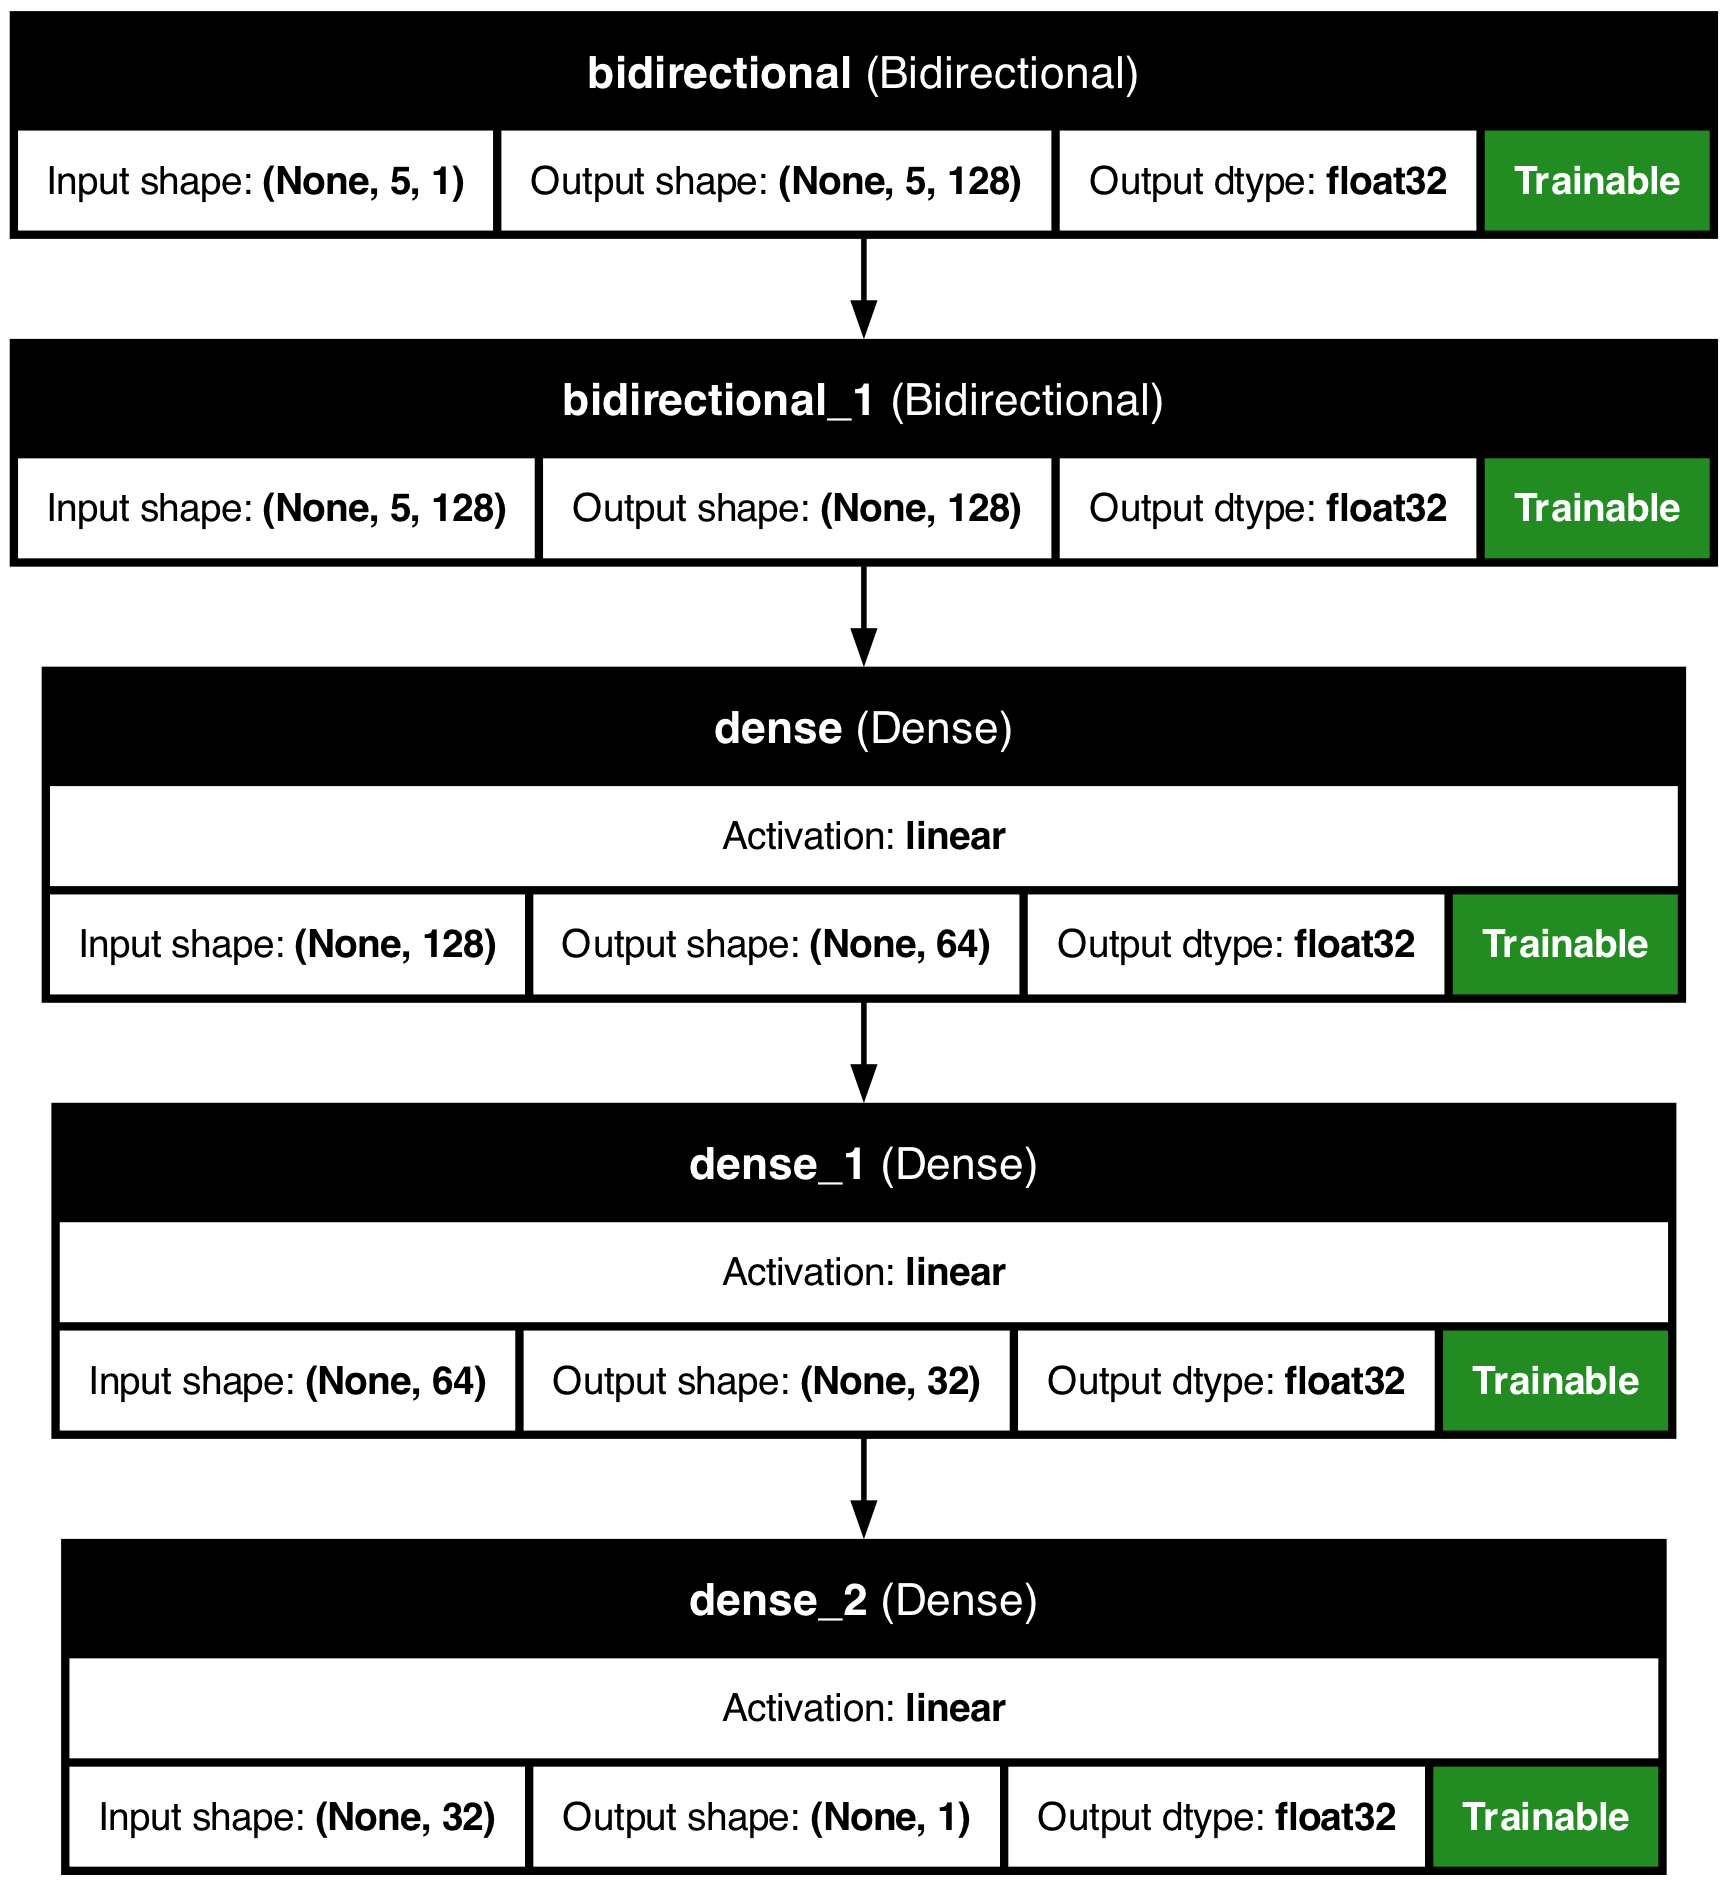

In [13]:
plot_model(
    simple_rnn,
    to_file="Images/simple_rnn.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [14]:
rnn_checkpoint_callback = ModelCheckpoint(
    filepath="../../../Models/simple_rnn.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
rnn_tensorboard_callback = TensorBoard(
    log_dir="../../../Logs/simple_rnn_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/simple_rnn_logs"

rnn_csvlogger_callback = CSVLogger("../../../Logs/simple_rnn_logs/simple_rnn_logs.csv")

simple_rnn_history = simple_rnn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=150,
    validation_split=0.2,
    callbacks=[
        rnn_checkpoint_callback,
        rnn_tensorboard_callback,
        rnn_csvlogger_callback,
    ],
)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 14295.4004 - r2_score: -3.6511 - val_loss: 14191.9873 - val_r2_score: -5.7185
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 13765.3789 - r2_score: -3.4787 - val_loss: 13706.1045 - val_r2_score: -5.4885
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 13307.9160 - r2_score: -3.3299 - val_loss: 13266.1914 - val_r2_score: -5.2803
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 12894.5928 - r2_score: -3.1954 - val_loss: 12851.4697 - val_r2_score: -5.0839
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 12505.4014 - r2_score: -3.0687 - val_loss: 12453.2715 - val_r2_score: -4.8954
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 12132.0566 - r2_score: -2.9473 - val_loss: 12065.9375 - val_r2_score: -4.7121
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 11769.2812 - r2_score: -2.8292 - val_loss: 11687.9590 - val_r2_score: -4.5331
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165m

In [15]:
simple_rnn_train_loss = simple_rnn_history.history["loss"]
simple_rnn_train_acc = simple_rnn_history.history["r2_score"]
simple_rnn_val_loss = simple_rnn_history.history["val_loss"]
simple_rnn_val_acc = simple_rnn_history.history["val_r2_score"]


print("Training loss:", np.mean(simple_rnn_train_loss))
print("Validation loss:", np.mean(simple_rnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(simple_rnn_train_acc), np.std(simple_rnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(simple_rnn_val_acc), np.std(simple_rnn_val_acc))
)

Training loss: 2055.6779112656413
Validation loss: 1897.5941384705777
0.331166 Training accuracy with a standard deviation of 1.204491
0.101671 Validation accuracy with a standard deviation of 1.714049


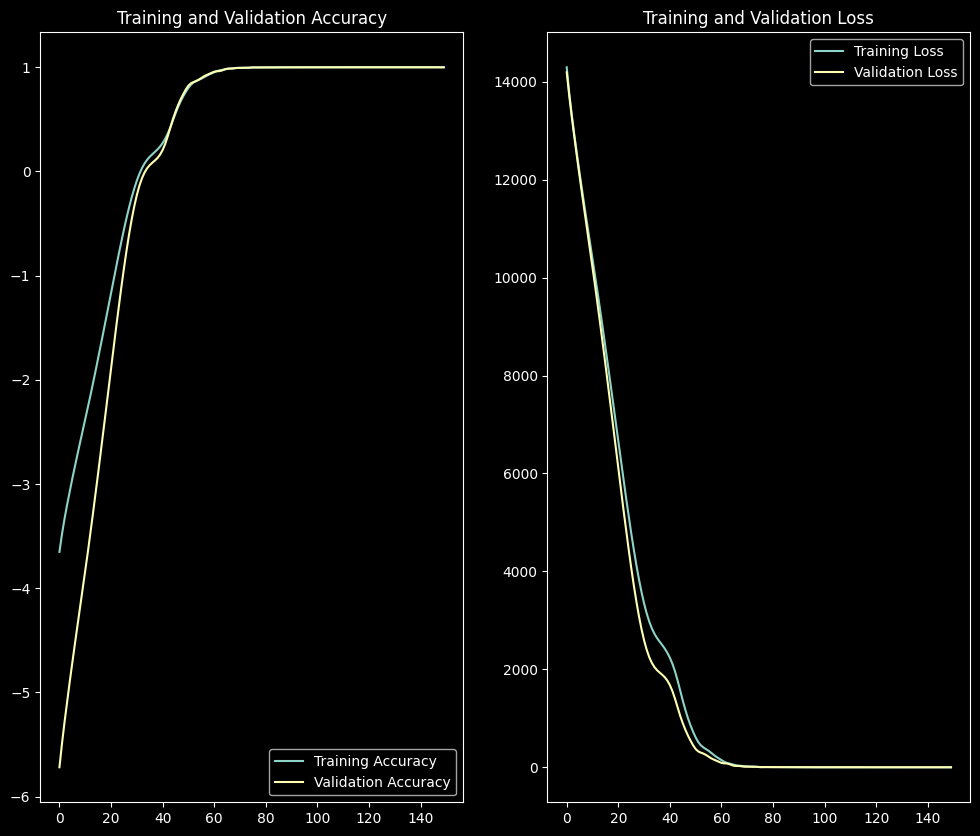

In [16]:
epochs_range = range(150)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, simple_rnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, simple_rnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, simple_rnn_train_loss, label="Training Loss")
plt.plot(epochs_range, simple_rnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("Images/simple_rnn_acc_loss.png", bbox_inches="tight")

In [17]:
simple_rnn_test_loss, simple_rnn_test_accuracy = simple_rnn.evaluate(X_test, y_test)
print("Test loss:", simple_rnn_test_loss)
print("Test accuracy:", simple_rnn_test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2426 - r2_score: 0.9999
Test loss: 0.24259795248508453
Test accuracy: 0.9999310970306396
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2426 - r2_score: 0.9999
Test loss: 0.24259795248508453
Test accuracy: 0.9999310970306396


In [18]:
prediction = simple_rnn.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
